In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [98]:
import numpy as np
import pandas as pd
import datetime as dt
from pprint import pprint

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [34]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
most_recent_date = dt.date(2017, 8, 23)
most_recent_date

datetime.date(2017, 8, 23)

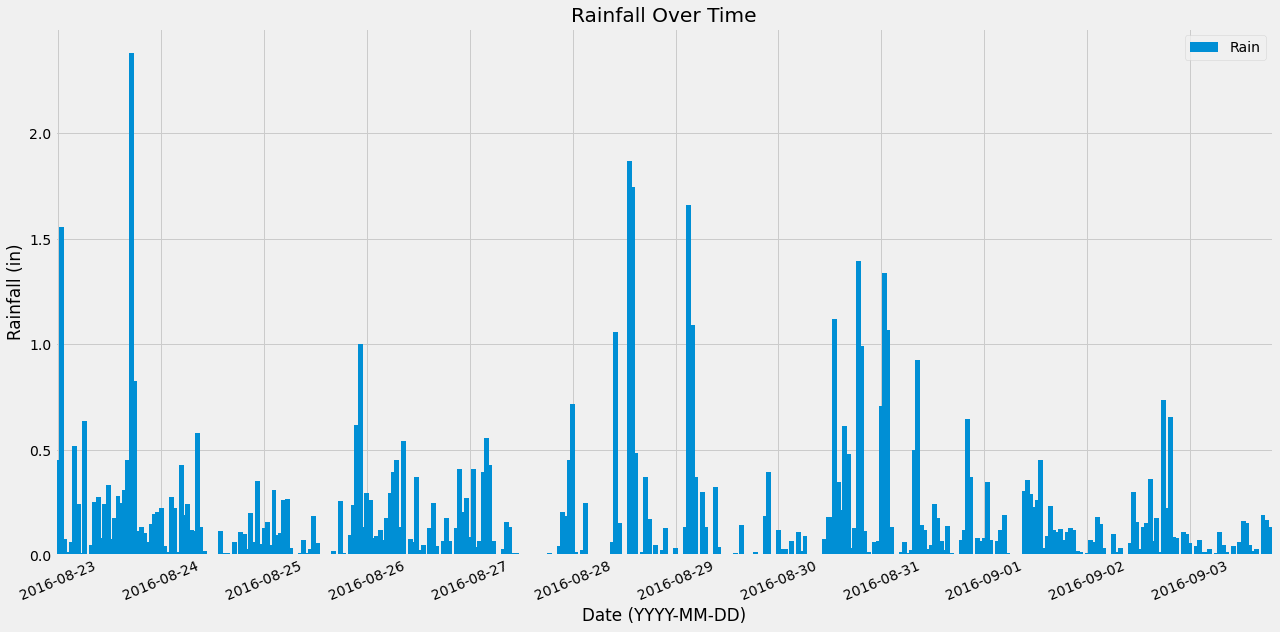

In [86]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.  

# Calculate the date one year from the last date in data set.
one_year_ago = most_recent_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
rain_results = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                        filter(Measurement.date >= one_year_ago).\
                        group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_df = pd.DataFrame(rain_results, columns = ["Date", "Rain"])

# Sort the dataframe by date
rain_df1 = rain_df.set_index("Date")

# Use Pandas Plotting with Matplotlib to plot the data
rain_chart = rain_df1.plot(kind="bar", width=1.5, figsize=(18, 9))
plt.title("Rainfall Over Time")
plt.xlabel("Date (YYYY-MM-DD)")
plt.ylabel("Rainfall (in)")

plt.xticks(rotation=22.5, ha="center")
plt.locator_params(axis='x', nbins=12)

plt.tight_layout()
plt.show()

In [95]:
inspector = inspect(engine)
inspector.get_table_names()
col = inspector.get_columns('measurement')
for c in col:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [101]:
rain_summary = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                        group_by(Measurement.date).all()
rain_summary_df = pd.DataFrame(rain_summary, columns = ["Date", "Rain"])
rain_summary_df.describe()
display(rain_df1.describe(), rain_summary_df.describe())

,Rain
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


,Rain
count,2792.000000
mean,0.161962
std,0.345704
min,0.000000
25%,0.010000
50%,0.058333
75%,0.173571
max,5.970000


In [102]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_summary = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                        group_by(Measurement.date).all()
rain_summary_df = pd.DataFrame(rain_summary, columns = ["Date", "Rain"])
rain_summary_df.describe()

,Rain
count,2792.000000
mean,0.161962
std,0.345704
min,0.000000
25%,0.010000
50%,0.058333
75%,0.173571
max,5.970000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

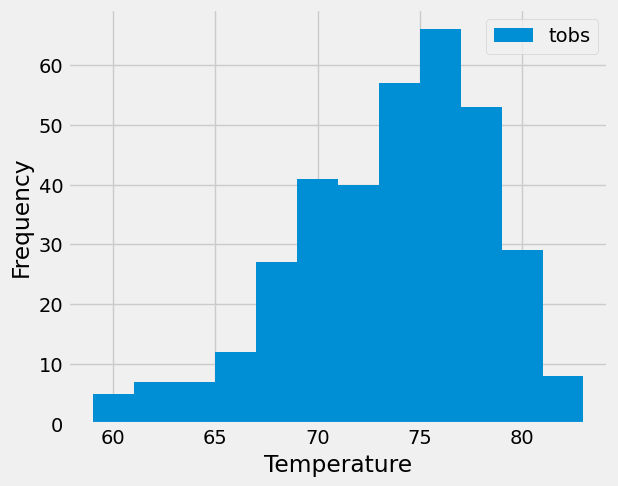

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()